In [1]:
from os import listdir
from numpy import asarray, load
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np

In [2]:
def load_images(path, size=(256,512)):
    src_list, tar_list = list(), list()
    for filename in listdir(path):
        pixels = load_img(path + filename, target_size=size)
        pixels = img_to_array(pixels)
        sat_img, map_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [asarray(src_list), asarray(tar_list)]

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


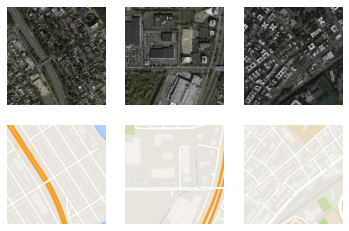

In [3]:
path = 'maps/train/'
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)


n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(src_images[i].astype('uint8'))
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

In [4]:
import import_ipynb
from model import define_discriminator, define_generator, define_gan, train
image_shape = src_images.shape[1:]
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

data = [src_images, tar_images]

def preprocess_data(data):
    X1, X2 = data[0], data[1]
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

dataset = preprocess_data(data)

importing Jupyter notebook from model.ipynb


/Users/deep/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


/Users/deep/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
from datetime import datetime 
start1 = datetime.now() 

train(d_model, g_model, gan_model, dataset, n_epochs=10, n_batch=1) 

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

>1, d1[0.473] d2[0.743] g[71.887]
>2, d1[0.351] d2[0.559] g[83.292]
>3, d1[0.342] d2[0.499] g[78.190]
>4, d1[0.454] d2[0.512] g[70.327]
>5, d1[0.997] d2[0.590] g[66.496]
>6, d1[0.320] d2[0.441] g[72.640]
>7, d1[0.344] d2[0.404] g[69.431]
>8, d1[0.285] d2[0.368] g[66.779]
>9, d1[0.271] d2[0.341] g[55.337]
>10, d1[0.133] d2[0.360] g[60.167]
>11, d1[0.258] d2[0.327] g[58.381]
>12, d1[0.145] d2[0.346] g[41.881]
>13, d1[0.033] d2[0.155] g[42.643]
>14, d1[0.694] d2[0.235] g[44.358]
>15, d1[0.290] d2[0.282] g[46.088]
>16, d1[0.108] d2[0.253] g[49.136]
>17, d1[0.657] d2[0.504] g[38.113]
>18, d1[0.588] d2[0.253] g[36.066]
>19, d1[0.493] d2[1.074] g[21.032]
>20, d1[0.136] d2[0.143] g[40.824]
>21, d1[0.200] d2[0.170] g[34.119]
>22, d1[0.131] d2[0.170] g[33.422]
>23, d1[0.209] d2[0.147] g[30.824]
>24, d1[0.098] d2[0.296] g[27.869]
>25, d1[0.269] d2[0.108] g[27.651]
>26, d1[0.734] d2[1.320] g[21.982]
>27, d1[0.062] d2[0.362] g[24.176]
>28, d1[0.902] d2[0.374] g[18.114]
>29, d1[0.583] d2[0.312] g[18

>233, d1[0.079] d2[0.144] g[24.071]
>234, d1[0.421] d2[0.282] g[9.131]
>235, d1[0.076] d2[0.127] g[13.687]
>236, d1[0.346] d2[0.285] g[8.782]
>237, d1[0.034] d2[0.093] g[17.619]
>238, d1[0.026] d2[0.083] g[17.845]
>239, d1[0.550] d2[0.189] g[8.471]
>240, d1[0.015] d2[0.190] g[15.665]
>241, d1[0.031] d2[0.167] g[12.812]
>242, d1[0.054] d2[0.120] g[12.395]
>243, d1[0.233] d2[0.065] g[22.836]
>244, d1[0.015] d2[0.291] g[11.867]
>245, d1[0.701] d2[0.185] g[9.384]
>246, d1[0.022] d2[0.137] g[20.903]
>247, d1[0.014] d2[0.230] g[25.564]
>248, d1[0.615] d2[0.476] g[9.348]
>249, d1[0.597] d2[0.232] g[8.989]
>250, d1[0.336] d2[0.271] g[8.799]
>251, d1[0.009] d2[0.197] g[13.297]
>252, d1[0.025] d2[0.109] g[18.246]
>253, d1[0.492] d2[0.188] g[8.842]
>254, d1[0.485] d2[0.337] g[7.555]
>255, d1[0.022] d2[0.324] g[17.016]
>256, d1[0.457] d2[0.298] g[8.032]
>257, d1[0.020] d2[0.053] g[24.215]
>258, d1[0.146] d2[0.396] g[21.515]
>259, d1[0.707] d2[0.175] g[10.488]
>260, d1[0.189] d2[0.151] g[13.133]
>2

>463, d1[0.015] d2[0.027] g[12.755]
>464, d1[0.033] d2[0.012] g[22.710]
>465, d1[0.020] d2[0.032] g[13.735]
>466, d1[0.024] d2[0.022] g[12.015]
>467, d1[0.786] d2[0.131] g[8.937]
>468, d1[0.325] d2[0.352] g[8.916]
>469, d1[0.071] d2[0.166] g[9.918]
>470, d1[0.008] d2[0.089] g[14.511]
>471, d1[0.037] d2[0.062] g[19.238]
>472, d1[0.038] d2[0.086] g[12.927]
>473, d1[0.325] d2[0.264] g[9.265]
>474, d1[0.026] d2[0.151] g[12.927]
>475, d1[0.161] d2[0.112] g[9.718]
>476, d1[0.661] d2[0.585] g[10.391]
>477, d1[0.077] d2[0.101] g[11.492]
>478, d1[0.005] d2[0.062] g[15.058]
>479, d1[0.088] d2[0.028] g[14.893]
>480, d1[0.005] d2[0.067] g[12.879]
>481, d1[0.009] d2[0.049] g[15.546]
>482, d1[0.021] d2[0.099] g[16.728]
>483, d1[0.019] d2[0.059] g[12.754]
>484, d1[0.066] d2[0.058] g[10.724]
>485, d1[0.676] d2[0.563] g[10.892]
>486, d1[0.708] d2[0.046] g[16.465]
>487, d1[0.637] d2[0.074] g[7.280]
>488, d1[0.161] d2[0.127] g[16.276]
>489, d1[0.094] d2[0.148] g[12.957]
>490, d1[0.285] d2[0.157] g[9.488]

>692, d1[0.110] d2[0.101] g[15.380]
>693, d1[0.465] d2[0.181] g[9.931]
>694, d1[0.060] d2[0.794] g[9.111]
>695, d1[0.002] d2[0.141] g[14.909]
>696, d1[0.543] d2[0.324] g[8.477]
>697, d1[0.229] d2[0.085] g[19.528]
>698, d1[0.256] d2[0.402] g[9.030]
>699, d1[0.095] d2[0.262] g[8.859]
>700, d1[0.201] d2[0.202] g[8.758]
>701, d1[0.186] d2[0.199] g[8.103]
>702, d1[0.004] d2[0.108] g[11.780]
>703, d1[0.007] d2[0.058] g[13.240]
>704, d1[0.602] d2[0.217] g[8.642]
>705, d1[0.020] d2[0.124] g[9.283]
>706, d1[0.174] d2[0.189] g[8.492]
>707, d1[0.002] d2[0.106] g[19.396]
>708, d1[0.003] d2[0.130] g[18.222]
>709, d1[0.303] d2[0.291] g[10.549]
>710, d1[0.381] d2[0.710] g[10.895]
>711, d1[0.561] d2[0.162] g[9.849]
>712, d1[0.418] d2[0.162] g[8.907]
>713, d1[0.012] d2[0.685] g[16.568]
>714, d1[0.280] d2[0.413] g[8.171]
>715, d1[1.221] d2[0.071] g[10.867]
>716, d1[0.023] d2[0.059] g[19.032]
>717, d1[0.808] d2[0.216] g[11.401]
>718, d1[0.014] d2[0.493] g[15.704]
>719, d1[0.001] d2[0.069] g[16.292]
>720,

>922, d1[0.005] d2[0.628] g[22.930]
>923, d1[0.276] d2[0.071] g[11.239]
>924, d1[0.017] d2[0.121] g[15.517]
>925, d1[0.465] d2[0.484] g[9.777]
>926, d1[0.042] d2[0.684] g[12.915]
>927, d1[0.640] d2[0.049] g[9.857]
>928, d1[0.689] d2[0.234] g[10.589]
>929, d1[0.905] d2[0.141] g[10.840]
>930, d1[0.148] d2[0.292] g[9.843]
>931, d1[0.334] d2[0.206] g[13.675]
>932, d1[0.126] d2[0.252] g[8.931]
>933, d1[0.105] d2[0.163] g[11.315]
>934, d1[0.003] d2[0.192] g[12.515]
>935, d1[0.027] d2[0.059] g[14.689]
>936, d1[0.006] d2[0.073] g[19.973]
>937, d1[0.006] d2[0.050] g[27.077]
>938, d1[0.112] d2[0.096] g[11.760]
>939, d1[0.054] d2[0.089] g[16.972]
>940, d1[0.006] d2[0.137] g[12.197]
>941, d1[0.191] d2[0.142] g[13.030]
>942, d1[0.088] d2[0.274] g[8.914]
>943, d1[0.089] d2[0.393] g[10.025]
>944, d1[1.221] d2[0.098] g[12.469]
>945, d1[0.404] d2[0.126] g[9.476]
>946, d1[0.086] d2[0.249] g[8.852]
>947, d1[0.094] d2[0.231] g[9.079]
>948, d1[0.140] d2[0.170] g[8.991]
>949, d1[0.040] d2[0.087] g[9.601]
>9

>1148, d1[0.272] d2[0.137] g[12.417]
>1149, d1[0.007] d2[0.094] g[20.422]
>1150, d1[0.121] d2[0.197] g[8.448]
>1151, d1[0.075] d2[0.169] g[8.356]
>1152, d1[0.034] d2[0.081] g[10.629]
>1153, d1[0.043] d2[0.071] g[22.607]
>1154, d1[0.017] d2[0.097] g[20.536]
>1155, d1[0.417] d2[0.223] g[8.634]
>1156, d1[0.002] d2[0.076] g[23.492]
>1157, d1[0.005] d2[0.066] g[14.354]
>1158, d1[0.978] d2[1.350] g[12.527]
>1159, d1[0.275] d2[0.352] g[10.961]
>1160, d1[0.356] d2[0.273] g[13.718]
>1161, d1[0.078] d2[0.057] g[12.157]
>1162, d1[0.302] d2[0.127] g[8.303]
>1163, d1[0.228] d2[0.423] g[13.257]
>1164, d1[0.382] d2[0.159] g[7.737]
>1165, d1[0.095] d2[0.290] g[9.132]
>1166, d1[0.333] d2[0.307] g[10.569]
>1167, d1[0.002] d2[0.085] g[20.638]
>1168, d1[0.044] d2[0.076] g[11.765]
>1169, d1[0.447] d2[0.252] g[8.746]
>1170, d1[0.285] d2[0.305] g[8.583]
>1171, d1[0.044] d2[0.205] g[9.721]
>1172, d1[0.441] d2[0.339] g[8.656]
>1173, d1[0.122] d2[0.198] g[10.639]
>1174, d1[0.014] d2[0.057] g[11.157]
>1175, d1[0

>1372, d1[0.796] d2[0.309] g[9.897]
>1373, d1[0.245] d2[0.179] g[14.754]
>1374, d1[0.005] d2[0.093] g[18.379]
>1375, d1[0.695] d2[0.176] g[9.399]
>1376, d1[0.400] d2[0.242] g[12.005]
>1377, d1[0.063] d2[0.401] g[8.639]
>1378, d1[0.001] d2[0.100] g[13.511]
>1379, d1[0.722] d2[0.109] g[8.913]
>1380, d1[0.009] d2[0.091] g[11.395]
>1381, d1[0.001] d2[0.124] g[14.618]
>1382, d1[0.019] d2[0.269] g[11.502]
>1383, d1[0.110] d2[0.108] g[9.091]
>1384, d1[0.001] d2[0.083] g[16.024]
>1385, d1[0.004] d2[0.044] g[15.055]
>1386, d1[0.682] d2[0.167] g[8.666]
>1387, d1[0.002] d2[0.059] g[15.789]
>1388, d1[0.001] d2[0.108] g[16.554]
>1389, d1[0.001] d2[0.096] g[19.026]
>1390, d1[0.019] d2[0.261] g[11.350]
>1391, d1[0.062] d2[0.127] g[10.860]
>1392, d1[0.682] d2[0.209] g[9.524]
>1393, d1[0.116] d2[0.257] g[9.593]
>1394, d1[0.298] d2[0.173] g[8.831]
>1395, d1[0.028] d2[0.193] g[12.362]
>1396, d1[0.001] d2[0.064] g[22.008]
>1397, d1[0.501] d2[0.496] g[15.678]
>1398, d1[0.124] d2[0.127] g[16.231]
>1399, d1[

>1596, d1[0.004] d2[0.078] g[11.698]
>1597, d1[0.007] d2[0.085] g[10.291]
>1598, d1[0.969] d2[0.115] g[12.179]
>1599, d1[0.001] d2[0.180] g[15.379]
>1600, d1[0.013] d2[0.111] g[9.479]
>1601, d1[0.321] d2[0.146] g[8.727]
>1602, d1[0.035] d2[0.262] g[11.929]
>1603, d1[0.355] d2[0.199] g[8.404]
>1604, d1[0.215] d2[0.391] g[7.965]
>1605, d1[0.097] d2[0.177] g[8.872]
>1606, d1[0.309] d2[0.133] g[8.748]
>1607, d1[0.137] d2[0.660] g[10.842]
>1608, d1[0.008] d2[0.058] g[11.891]
>1609, d1[0.662] d2[0.117] g[7.504]
>1610, d1[0.112] d2[0.288] g[7.823]
>1611, d1[0.488] d2[0.419] g[10.448]
>1612, d1[0.082] d2[0.176] g[8.358]
>1613, d1[0.075] d2[0.162] g[8.321]
>1614, d1[0.039] d2[0.121] g[9.507]
>1615, d1[0.026] d2[0.078] g[9.858]
>1616, d1[0.037] d2[0.072] g[9.030]
>1617, d1[0.014] d2[0.069] g[11.340]
>1618, d1[0.205] d2[0.124] g[8.305]
>1619, d1[0.000] d2[0.095] g[12.672]
>1620, d1[0.329] d2[0.340] g[8.063]
>1621, d1[0.245] d2[0.421] g[11.744]
>1622, d1[0.002] d2[0.108] g[15.533]
>1623, d1[0.001]

>1820, d1[0.339] d2[0.081] g[13.997]
>1821, d1[0.159] d2[0.200] g[9.024]
>1822, d1[0.383] d2[0.709] g[9.618]
>1823, d1[0.130] d2[0.090] g[8.746]
>1824, d1[0.284] d2[0.066] g[20.056]
>1825, d1[0.003] d2[0.151] g[13.555]
>1826, d1[0.003] d2[0.090] g[20.821]
>1827, d1[0.101] d2[0.215] g[8.751]
>1828, d1[0.021] d2[0.057] g[10.666]
>1829, d1[0.012] d2[0.074] g[10.362]
>1830, d1[0.011] d2[0.062] g[21.021]
>1831, d1[0.037] d2[0.034] g[20.848]
>1832, d1[0.195] d2[0.179] g[10.081]
>1833, d1[0.325] d2[0.549] g[12.436]
>1834, d1[0.004] d2[0.095] g[15.310]
>1835, d1[0.505] d2[0.573] g[10.152]
>1836, d1[0.560] d2[0.168] g[13.184]
>1837, d1[0.136] d2[0.264] g[12.911]
>1838, d1[0.972] d2[0.115] g[10.342]
>1839, d1[0.016] d2[0.245] g[8.372]
>1840, d1[0.762] d2[0.078] g[10.838]
>1841, d1[0.124] d2[0.179] g[8.682]
>1842, d1[0.026] d2[0.177] g[9.058]
>1843, d1[0.109] d2[0.161] g[23.688]
>1844, d1[0.071] d2[0.253] g[9.972]
>1845, d1[0.974] d2[0.498] g[11.367]
>1846, d1[0.385] d2[0.414] g[9.829]
>1847, d1[

>2045, d1[0.031] d2[0.051] g[17.189]
>2046, d1[0.006] d2[0.092] g[16.683]
>2047, d1[0.642] d2[0.234] g[10.321]
>2048, d1[0.770] d2[0.229] g[11.060]
>2049, d1[0.136] d2[0.126] g[13.216]
>2050, d1[0.161] d2[0.334] g[8.770]
>2051, d1[0.003] d2[0.083] g[19.342]
>2052, d1[0.381] d2[0.090] g[9.449]
>2053, d1[0.236] d2[0.265] g[11.541]
>2054, d1[0.017] d2[0.110] g[14.633]
>2055, d1[0.076] d2[0.108] g[9.534]
>2056, d1[0.066] d2[0.107] g[11.794]
>2057, d1[0.061] d2[0.111] g[10.354]
>2058, d1[0.038] d2[0.101] g[11.899]
>2059, d1[0.159] d2[0.173] g[8.576]
>2060, d1[0.064] d2[0.287] g[9.004]
>2061, d1[0.025] d2[0.045] g[11.762]
>2062, d1[0.647] d2[0.258] g[13.958]
>2063, d1[0.047] d2[0.074] g[9.406]
>2064, d1[0.627] d2[0.177] g[10.067]
>2065, d1[0.247] d2[0.320] g[11.127]
>2066, d1[0.023] d2[0.109] g[13.464]
>2067, d1[0.088] d2[0.138] g[9.501]
>2068, d1[0.576] d2[0.217] g[20.178]
>2069, d1[0.003] d2[0.320] g[19.031]
>2070, d1[0.029] d2[0.112] g[10.122]
>2071, d1[0.060] d2[0.062] g[18.189]
>2072, d

>2269, d1[0.137] d2[0.304] g[8.515]
>2270, d1[0.079] d2[0.115] g[9.828]
>2271, d1[0.036] d2[0.088] g[14.917]
>2272, d1[0.284] d2[0.129] g[9.601]
>2273, d1[0.884] d2[0.161] g[10.378]
>2274, d1[0.080] d2[0.309] g[8.336]
>2275, d1[0.073] d2[0.081] g[11.358]
>2276, d1[0.026] d2[0.153] g[10.164]
>2277, d1[0.235] d2[0.134] g[7.736]
>2278, d1[0.013] d2[0.204] g[7.950]
>2279, d1[0.096] d2[0.155] g[10.121]
>2280, d1[0.005] d2[0.086] g[20.007]
>2281, d1[0.063] d2[0.083] g[10.595]
>2282, d1[0.019] d2[0.234] g[7.491]
>2283, d1[0.070] d2[0.062] g[13.723]
>2284, d1[0.430] d2[0.234] g[10.926]
>2285, d1[0.007] d2[0.044] g[21.933]
>2286, d1[0.122] d2[0.140] g[11.545]
>2287, d1[0.556] d2[0.105] g[10.236]
>2288, d1[0.292] d2[0.502] g[11.889]
>2289, d1[0.001] d2[0.225] g[19.171]
>2290, d1[0.260] d2[0.089] g[10.231]
>2291, d1[0.024] d2[0.130] g[11.994]
>2292, d1[0.040] d2[0.098] g[10.756]
>2293, d1[0.016] d2[0.194] g[8.363]
>2294, d1[0.599] d2[0.235] g[9.789]
>2295, d1[0.001] d2[0.043] g[13.440]
>2296, d1[

>2493, d1[0.084] d2[0.042] g[10.875]
>2494, d1[0.003] d2[0.035] g[12.984]
>2495, d1[0.013] d2[0.059] g[14.746]
>2496, d1[0.003] d2[0.046] g[12.094]
>2497, d1[0.212] d2[0.077] g[8.695]
>2498, d1[0.005] d2[0.040] g[13.632]
>2499, d1[0.018] d2[0.162] g[9.455]
>2500, d1[0.086] d2[0.070] g[8.542]
>2501, d1[0.003] d2[0.063] g[12.396]
>2502, d1[0.003] d2[0.036] g[11.754]
>2503, d1[0.740] d2[0.242] g[9.914]
>2504, d1[0.022] d2[0.143] g[8.856]
>2505, d1[0.003] d2[0.030] g[12.272]
>2506, d1[0.037] d2[0.072] g[20.155]
>2507, d1[0.013] d2[0.042] g[7.005]
>2508, d1[0.004] d2[0.042] g[16.200]
>2509, d1[0.552] d2[0.301] g[9.362]
>2510, d1[0.236] d2[0.193] g[9.991]
>2511, d1[0.007] d2[0.233] g[8.139]
>2512, d1[0.021] d2[0.061] g[8.944]
>2513, d1[0.004] d2[0.034] g[14.667]
>2514, d1[0.121] d2[0.054] g[9.615]
>2515, d1[0.072] d2[0.226] g[10.662]
>2516, d1[0.232] d2[0.064] g[7.250]
>2517, d1[0.004] d2[0.055] g[14.460]
>2518, d1[0.001] d2[0.092] g[11.226]
>2519, d1[0.008] d2[0.096] g[6.697]
>2520, d1[0.05

>2718, d1[0.329] d2[0.123] g[15.031]
>2719, d1[0.002] d2[0.124] g[13.334]
>2720, d1[0.088] d2[0.038] g[10.309]
>2721, d1[0.377] d2[0.292] g[9.102]
>2722, d1[0.003] d2[0.063] g[11.240]
>2723, d1[0.002] d2[0.078] g[16.286]
>2724, d1[0.422] d2[0.202] g[9.150]
>2725, d1[0.001] d2[0.086] g[11.544]
>2726, d1[0.061] d2[0.080] g[7.844]
>2727, d1[0.357] d2[0.259] g[7.753]
>2728, d1[0.017] d2[0.087] g[8.851]
>2729, d1[0.072] d2[0.421] g[8.040]
>2730, d1[0.753] d2[0.209] g[7.504]
>2731, d1[0.160] d2[0.500] g[7.813]
>2732, d1[0.028] d2[0.023] g[10.359]
>2733, d1[0.267] d2[0.042] g[8.457]
>2734, d1[0.219] d2[0.248] g[7.370]
>2735, d1[0.060] d2[0.068] g[9.675]
>2736, d1[0.001] d2[0.104] g[10.238]
>2737, d1[0.510] d2[0.409] g[7.758]
>2738, d1[0.043] d2[0.064] g[9.258]
>2739, d1[0.002] d2[0.033] g[10.722]
>2740, d1[0.008] d2[0.036] g[18.515]
>2741, d1[0.002] d2[0.036] g[12.375]
>2742, d1[0.117] d2[0.102] g[10.467]
>2743, d1[0.491] d2[0.431] g[8.468]
>2744, d1[0.276] d2[0.282] g[8.064]
>2745, d1[0.028]

>2942, d1[0.421] d2[0.100] g[9.099]
>2943, d1[0.015] d2[0.098] g[13.500]
>2944, d1[0.514] d2[0.168] g[6.526]
>2945, d1[0.008] d2[0.169] g[11.949]
>2946, d1[0.272] d2[0.239] g[7.533]
>2947, d1[0.054] d2[0.109] g[8.891]
>2948, d1[0.106] d2[0.102] g[9.002]
>2949, d1[0.007] d2[0.074] g[12.236]
>2950, d1[0.015] d2[0.120] g[15.872]
>2951, d1[0.023] d2[0.072] g[9.668]
>2952, d1[0.060] d2[0.152] g[12.244]
>2953, d1[0.165] d2[0.056] g[10.846]
>2954, d1[0.051] d2[0.239] g[8.949]
>2955, d1[0.120] d2[0.088] g[9.751]
>2956, d1[0.120] d2[0.074] g[10.063]
>2957, d1[0.093] d2[0.364] g[8.734]
>2958, d1[1.005] d2[0.062] g[9.259]
>2959, d1[0.003] d2[0.053] g[19.656]
>2960, d1[0.003] d2[0.081] g[15.680]
>2961, d1[0.096] d2[0.073] g[11.136]
>2962, d1[0.165] d2[0.340] g[7.503]
>2963, d1[0.015] d2[0.068] g[5.922]
>2964, d1[0.007] d2[0.039] g[15.062]
>2965, d1[0.081] d2[0.092] g[8.371]
>2966, d1[0.005] d2[0.053] g[13.717]
>2967, d1[0.004] d2[0.057] g[17.543]
>2968, d1[0.005] d2[0.076] g[13.181]
>2969, d1[0.03

>3166, d1[0.102] d2[0.158] g[8.439]
>3167, d1[0.072] d2[0.047] g[17.064]
>3168, d1[0.302] d2[0.329] g[6.746]
>3169, d1[0.079] d2[0.077] g[12.858]
>3170, d1[0.049] d2[0.269] g[7.958]
>3171, d1[0.036] d2[0.050] g[17.636]
>3172, d1[0.052] d2[0.068] g[12.614]
>3173, d1[0.347] d2[0.203] g[7.118]
>3174, d1[0.480] d2[0.130] g[8.050]
>3175, d1[0.025] d2[0.269] g[8.379]
>3176, d1[0.035] d2[0.054] g[13.472]
>3177, d1[0.022] d2[0.049] g[13.860]
>3178, d1[0.228] d2[0.151] g[8.496]
>3179, d1[0.163] d2[0.350] g[8.263]
>3180, d1[0.074] d2[0.068] g[10.109]
>3181, d1[0.229] d2[0.145] g[9.268]
>3182, d1[0.125] d2[0.218] g[6.024]
>3183, d1[0.014] d2[0.068] g[16.011]
>3184, d1[0.077] d2[0.082] g[11.258]
>3185, d1[0.698] d2[0.300] g[7.406]
>3186, d1[0.034] d2[0.158] g[13.332]
>3187, d1[0.241] d2[0.246] g[8.099]
>3188, d1[0.044] d2[0.107] g[8.259]
>3189, d1[0.005] d2[0.044] g[16.491]
>3190, d1[0.078] d2[0.105] g[7.828]
>3191, d1[0.006] d2[0.079] g[11.074]
>3192, d1[0.177] d2[0.264] g[8.385]
>3193, d1[0.126]

>3390, d1[0.006] d2[0.037] g[18.065]
>3391, d1[0.014] d2[0.039] g[12.016]
>3392, d1[0.013] d2[0.030] g[14.655]
>3393, d1[0.017] d2[0.033] g[12.984]
>3394, d1[0.013] d2[0.045] g[10.805]
>3395, d1[0.123] d2[0.109] g[13.059]
>3396, d1[0.016] d2[0.052] g[17.091]
>3397, d1[0.376] d2[0.228] g[9.145]
>3398, d1[0.003] d2[0.045] g[15.561]
>3399, d1[0.276] d2[0.215] g[8.804]
>3400, d1[0.003] d2[0.044] g[16.124]
>3401, d1[0.014] d2[0.054] g[12.179]
>3402, d1[0.054] d2[0.050] g[10.523]
>3403, d1[0.156] d2[0.203] g[7.875]
>3404, d1[0.015] d2[0.032] g[12.863]
>3405, d1[0.013] d2[0.043] g[15.175]
>3406, d1[0.055] d2[0.030] g[12.746]
>3407, d1[0.009] d2[0.064] g[10.959]
>3408, d1[0.003] d2[0.043] g[23.882]
>3409, d1[0.036] d2[0.078] g[10.065]
>3410, d1[0.141] d2[0.066] g[13.305]
>3411, d1[0.122] d2[0.105] g[8.523]
>3412, d1[0.008] d2[0.179] g[10.301]
>3413, d1[0.277] d2[0.047] g[9.220]
>3414, d1[0.258] d2[0.628] g[12.681]
>3415, d1[0.010] d2[0.028] g[13.309]
>3416, d1[0.164] d2[0.055] g[11.558]
>3417,

>3614, d1[0.387] d2[0.060] g[13.495]
>3615, d1[0.054] d2[0.119] g[10.379]
>3616, d1[0.010] d2[0.288] g[9.599]
>3617, d1[0.014] d2[0.029] g[14.695]
>3618, d1[0.059] d2[0.026] g[14.702]
>3619, d1[0.196] d2[0.109] g[8.177]
>3620, d1[0.084] d2[0.144] g[6.740]
>3621, d1[0.040] d2[0.084] g[10.290]
>3622, d1[0.033] d2[0.096] g[8.278]
>3623, d1[0.017] d2[0.036] g[17.470]
>3624, d1[0.057] d2[0.041] g[16.010]
>3625, d1[0.118] d2[0.161] g[8.863]
>3626, d1[0.183] d2[0.126] g[8.533]
>3627, d1[0.019] d2[0.096] g[11.379]
>3628, d1[0.221] d2[0.132] g[9.225]
>3629, d1[0.006] d2[0.075] g[15.105]
>3630, d1[0.003] d2[0.145] g[14.520]
>3631, d1[0.103] d2[0.060] g[9.105]
>3632, d1[0.396] d2[0.257] g[8.176]
>3633, d1[0.004] d2[0.075] g[17.758]
>3634, d1[0.217] d2[0.208] g[9.064]
>3635, d1[0.017] d2[0.088] g[11.740]
>3636, d1[0.571] d2[0.262] g[8.061]
>3637, d1[0.119] d2[0.138] g[11.689]
>3638, d1[0.010] d2[0.062] g[10.148]
>3639, d1[0.065] d2[0.098] g[10.595]
>3640, d1[0.280] d2[0.277] g[7.524]
>3641, d1[0.0

>3839, d1[0.002] d2[0.186] g[15.916]
>3840, d1[0.008] d2[0.111] g[15.002]
>3841, d1[0.424] d2[0.105] g[9.210]
>3842, d1[0.029] d2[0.314] g[6.633]
>3843, d1[0.003] d2[0.074] g[13.925]
>3844, d1[0.004] d2[0.054] g[20.878]
>3845, d1[0.004] d2[0.059] g[19.544]
>3846, d1[0.895] d2[0.230] g[11.393]
>3847, d1[0.024] d2[0.095] g[11.587]
>3848, d1[0.005] d2[0.087] g[13.891]
>3849, d1[0.227] d2[0.123] g[11.882]
>3850, d1[0.060] d2[0.080] g[9.218]
>3851, d1[0.003] d2[0.060] g[13.335]
>3852, d1[0.710] d2[0.296] g[8.563]
>3853, d1[0.195] d2[0.164] g[8.935]
>3854, d1[0.086] d2[0.101] g[9.681]
>3855, d1[0.003] d2[0.092] g[11.183]
>3856, d1[0.221] d2[0.072] g[13.111]
>3857, d1[0.016] d2[0.345] g[9.298]
>3858, d1[0.024] d2[0.174] g[8.942]
>3859, d1[0.263] d2[0.152] g[8.008]
>3860, d1[0.007] d2[0.059] g[14.257]
>3861, d1[0.026] d2[0.059] g[10.043]
>3862, d1[0.004] d2[0.051] g[14.136]
>3863, d1[0.090] d2[0.141] g[10.059]
>3864, d1[0.010] d2[0.066] g[28.543]
>3865, d1[0.726] d2[0.821] g[11.878]
>3866, d1[

>4064, d1[0.006] d2[0.098] g[16.467]
>4065, d1[0.569] d2[0.124] g[8.289]
>4066, d1[0.002] d2[0.278] g[12.755]
>4067, d1[0.001] d2[0.112] g[12.307]
>4068, d1[0.181] d2[0.075] g[8.354]
>4069, d1[0.036] d2[0.158] g[8.545]
>4070, d1[0.206] d2[0.207] g[9.959]
>4071, d1[0.256] d2[0.169] g[7.764]
>4072, d1[0.024] d2[0.115] g[15.054]
>4073, d1[0.480] d2[0.166] g[8.588]
>4074, d1[0.003] d2[0.119] g[10.577]
>4075, d1[0.206] d2[0.099] g[7.713]
>4076, d1[0.002] d2[0.351] g[12.684]
>4077, d1[0.109] d2[0.044] g[9.992]
>4078, d1[0.002] d2[0.065] g[13.431]
>4079, d1[0.109] d2[0.056] g[9.439]
>4080, d1[0.361] d2[0.520] g[8.015]
>4081, d1[0.131] d2[0.072] g[10.380]
>4082, d1[0.023] d2[0.037] g[9.961]
>4083, d1[0.002] d2[0.074] g[13.058]
>4084, d1[0.425] d2[0.729] g[9.596]
>4085, d1[0.687] d2[0.116] g[7.283]
>4086, d1[0.014] d2[0.096] g[10.178]
>4087, d1[0.032] d2[0.227] g[9.688]
>4088, d1[0.157] d2[0.075] g[9.549]
>4089, d1[0.061] d2[0.093] g[10.885]
>4090, d1[0.238] d2[0.153] g[7.425]
>4091, d1[0.057] 

>4289, d1[0.006] d2[0.046] g[16.167]
>4290, d1[0.340] d2[0.180] g[7.850]
>4291, d1[0.263] d2[0.099] g[10.062]
>4292, d1[0.371] d2[0.242] g[9.674]
>4293, d1[0.013] d2[0.119] g[12.569]
>4294, d1[0.003] d2[0.073] g[6.440]
>4295, d1[0.002] d2[0.045] g[14.201]
>4296, d1[0.124] d2[0.053] g[9.609]
>4297, d1[0.162] d2[0.131] g[9.425]
>4298, d1[0.002] d2[0.130] g[17.836]
>4299, d1[0.818] d2[0.182] g[7.973]
>4300, d1[0.014] d2[0.111] g[15.012]
>4301, d1[0.037] d2[0.130] g[10.520]
>4302, d1[0.032] d2[0.041] g[9.525]
>4303, d1[0.129] d2[0.085] g[8.699]
>4304, d1[0.053] d2[0.066] g[10.476]
>4305, d1[0.026] d2[0.072] g[8.715]
>4306, d1[0.002] d2[0.093] g[11.315]
>4307, d1[0.002] d2[0.048] g[20.065]
>4308, d1[0.086] d2[0.057] g[14.604]
>4309, d1[0.025] d2[0.097] g[11.649]
>4310, d1[0.075] d2[0.205] g[10.876]
>4311, d1[0.013] d2[0.039] g[6.696]
>4312, d1[0.052] d2[0.041] g[9.507]
>4313, d1[0.013] d2[0.054] g[11.667]
>4314, d1[0.003] d2[0.023] g[15.293]
>4315, d1[0.004] d2[0.031] g[11.775]
>4316, d1[0.

>4514, d1[0.122] d2[0.139] g[11.359]
>4515, d1[0.002] d2[0.083] g[16.468]
>4516, d1[0.113] d2[0.083] g[5.977]
>4517, d1[0.148] d2[0.148] g[8.264]
>4518, d1[0.162] d2[0.078] g[6.821]
>4519, d1[0.069] d2[0.254] g[10.878]
>4520, d1[0.019] d2[0.043] g[12.968]
>4521, d1[0.003] d2[0.067] g[14.626]
>4522, d1[0.004] d2[0.060] g[11.888]
>4523, d1[0.590] d2[0.121] g[9.408]
>4524, d1[0.207] d2[0.496] g[8.566]
>4525, d1[0.021] d2[0.164] g[11.682]
>4526, d1[0.104] d2[0.054] g[10.637]
>4527, d1[0.005] d2[0.051] g[12.272]
>4528, d1[0.109] d2[0.104] g[19.749]
>4529, d1[0.290] d2[0.114] g[8.660]
>4530, d1[0.266] d2[0.255] g[8.671]
>4531, d1[0.014] d2[0.588] g[9.010]
>4532, d1[0.480] d2[0.029] g[10.395]
>4533, d1[0.472] d2[0.107] g[8.626]
>4534, d1[0.002] d2[0.254] g[12.335]
>4535, d1[0.244] d2[0.227] g[9.936]
>4536, d1[0.202] d2[0.204] g[7.460]
>4537, d1[0.002] d2[0.089] g[15.193]
>4538, d1[0.002] d2[0.075] g[16.901]
>4539, d1[0.244] d2[0.073] g[8.319]
>4540, d1[0.088] d2[0.070] g[9.507]
>4541, d1[0.00

>4739, d1[0.166] d2[0.293] g[7.684]
>4740, d1[0.031] d2[0.071] g[8.705]
>4741, d1[0.055] d2[0.033] g[9.352]
>4742, d1[0.002] d2[0.069] g[15.269]
>4743, d1[0.002] d2[0.038] g[11.918]
>4744, d1[0.051] d2[0.077] g[16.470]
>4745, d1[0.004] d2[0.041] g[9.000]
>4746, d1[0.042] d2[0.086] g[8.659]
>4747, d1[0.136] d2[0.094] g[9.020]
>4748, d1[0.002] d2[0.109] g[6.515]
>4749, d1[0.345] d2[0.109] g[7.593]
>4750, d1[0.001] d2[0.046] g[11.800]
>4751, d1[0.001] d2[0.068] g[16.870]
>4752, d1[0.012] d2[0.032] g[6.634]
>4753, d1[0.003] d2[0.030] g[17.137]
>4754, d1[0.154] d2[0.402] g[8.400]
>4755, d1[0.634] d2[0.186] g[9.147]
>4756, d1[0.026] d2[0.036] g[12.397]
>4757, d1[0.173] d2[0.057] g[8.642]
>4758, d1[0.216] d2[0.295] g[11.210]
>4759, d1[0.049] d2[0.110] g[12.161]
>4760, d1[0.004] d2[0.055] g[7.824]
>4761, d1[0.198] d2[0.040] g[10.899]
>4762, d1[0.063] d2[0.080] g[13.059]
>4763, d1[0.094] d2[0.087] g[8.477]
>4764, d1[0.003] d2[0.061] g[16.725]
>4765, d1[0.017] d2[0.074] g[10.144]
>4766, d1[0.041

>4964, d1[0.083] d2[0.035] g[8.688]
>4965, d1[0.100] d2[0.054] g[9.434]
>4966, d1[0.015] d2[0.147] g[8.194]
>4967, d1[0.001] d2[0.052] g[11.537]
>4968, d1[0.020] d2[0.102] g[16.044]
>4969, d1[0.220] d2[0.067] g[9.749]
>4970, d1[0.028] d2[0.056] g[8.263]
>4971, d1[0.027] d2[0.042] g[9.544]
>4972, d1[0.026] d2[0.040] g[11.166]
>4973, d1[0.005] d2[0.661] g[10.833]
>4974, d1[0.010] d2[0.017] g[15.553]
>4975, d1[0.023] d2[0.014] g[6.814]
>4976, d1[1.491] d2[0.071] g[8.468]
>4977, d1[1.102] d2[0.622] g[8.972]
>4978, d1[0.543] d2[0.325] g[9.641]
>4979, d1[0.277] d2[0.744] g[7.428]
>4980, d1[0.226] d2[0.127] g[8.451]
>4981, d1[0.013] d2[0.075] g[11.703]
>4982, d1[0.135] d2[0.203] g[9.187]
>4983, d1[0.025] d2[0.331] g[8.484]
>4984, d1[0.988] d2[0.068] g[8.282]
>4985, d1[0.203] d2[0.109] g[10.238]
>4986, d1[0.109] d2[0.284] g[7.957]
>4987, d1[0.431] d2[0.343] g[5.660]
>4988, d1[0.084] d2[0.125] g[7.591]
>4989, d1[0.111] d2[0.149] g[14.248]
>4990, d1[0.002] d2[0.072] g[12.212]
>4991, d1[0.001] d2

>5189, d1[0.309] d2[0.130] g[8.739]
>5190, d1[0.009] d2[0.072] g[8.190]
>5191, d1[0.005] d2[0.082] g[4.700]
>5192, d1[0.040] d2[0.109] g[10.853]
>5193, d1[0.009] d2[0.059] g[9.425]
>5194, d1[0.001] d2[0.051] g[12.459]
>5195, d1[0.168] d2[0.127] g[8.106]
>5196, d1[0.047] d2[0.104] g[11.576]
>5197, d1[0.328] d2[0.118] g[11.304]
>5198, d1[0.039] d2[0.165] g[10.541]
>5199, d1[0.001] d2[0.086] g[13.292]
>5200, d1[0.007] d2[0.036] g[5.723]
>5201, d1[0.002] d2[0.034] g[10.149]
>5202, d1[0.231] d2[0.122] g[8.640]
>5203, d1[0.147] d2[0.093] g[7.907]
>5204, d1[0.002] d2[0.068] g[14.680]
>5205, d1[0.001] d2[0.061] g[12.048]
>5206, d1[0.048] d2[0.051] g[9.602]
>5207, d1[0.018] d2[0.043] g[8.829]
>5208, d1[0.001] d2[0.039] g[12.077]
>5209, d1[0.372] d2[0.459] g[8.464]
>5210, d1[0.009] d2[0.048] g[11.164]
>5211, d1[0.089] d2[0.088] g[11.390]
>5212, d1[0.149] d2[0.087] g[8.947]
>5213, d1[0.002] d2[0.151] g[19.144]
>5214, d1[0.003] d2[0.076] g[12.810]
>5215, d1[0.030] d2[0.037] g[9.082]
>5216, d1[0.00

>5414, d1[0.109] d2[0.253] g[5.998]
>5415, d1[0.050] d2[0.070] g[9.203]
>5416, d1[0.099] d2[0.054] g[8.225]
>5417, d1[0.096] d2[0.079] g[8.139]
>5418, d1[0.004] d2[0.054] g[9.477]
>5419, d1[0.064] d2[0.057] g[8.117]
>5420, d1[0.033] d2[0.096] g[7.500]
>5421, d1[0.027] d2[0.152] g[12.300]
>5422, d1[0.032] d2[0.055] g[8.983]
>5423, d1[0.004] d2[0.061] g[15.670]
>5424, d1[0.394] d2[0.030] g[8.514]
>5425, d1[0.037] d2[0.161] g[9.181]
>5426, d1[0.003] d2[0.107] g[4.884]
>5427, d1[0.384] d2[0.129] g[8.350]
>5428, d1[0.015] d2[0.183] g[9.169]
>5429, d1[0.159] d2[0.066] g[8.709]
>5430, d1[0.329] d2[0.279] g[9.105]
>5431, d1[0.005] d2[0.230] g[10.752]
>5432, d1[0.014] d2[0.027] g[12.908]
>5433, d1[0.375] d2[0.075] g[7.430]
>5434, d1[0.054] d2[0.232] g[9.134]
>5435, d1[0.003] d2[0.051] g[14.127]
>5436, d1[1.149] d2[0.167] g[7.155]
>5437, d1[0.032] d2[0.275] g[7.565]
>5438, d1[0.003] d2[0.154] g[17.184]
>5439, d1[0.230] d2[0.293] g[9.199]
>5440, d1[0.904] d2[0.823] g[7.749]
>5441, d1[0.106] d2[0.

>5639, d1[1.073] d2[0.066] g[8.127]
>5640, d1[0.087] d2[0.171] g[9.176]
>5641, d1[0.036] d2[0.136] g[10.014]
>5642, d1[0.001] d2[0.093] g[14.320]
>5643, d1[0.505] d2[0.152] g[8.404]
>5644, d1[0.001] d2[0.127] g[11.285]
>5645, d1[0.001] d2[0.072] g[12.175]
>5646, d1[0.001] d2[0.043] g[13.520]
>5647, d1[0.010] d2[0.039] g[10.649]
>5648, d1[0.103] d2[0.117] g[5.804]
>5649, d1[0.031] d2[0.057] g[8.117]
>5650, d1[0.141] d2[0.048] g[14.739]
>5651, d1[0.001] d2[0.138] g[14.785]
>5652, d1[0.091] d2[0.110] g[9.498]
>5653, d1[0.001] d2[0.037] g[16.883]
>5654, d1[0.020] d2[0.043] g[9.583]
>5655, d1[0.001] d2[0.081] g[15.285]
>5656, d1[0.015] d2[0.035] g[10.221]
>5657, d1[0.002] d2[0.027] g[13.195]
>5658, d1[0.100] d2[0.028] g[11.095]
>5659, d1[0.159] d2[0.170] g[8.193]
>5660, d1[0.031] d2[0.121] g[8.324]
>5661, d1[0.027] d2[0.048] g[14.001]
>5662, d1[0.002] d2[0.050] g[11.044]
>5663, d1[0.165] d2[0.193] g[9.739]
>5664, d1[0.017] d2[0.052] g[12.433]
>5665, d1[0.803] d2[0.380] g[7.367]
>5666, d1[0.

>5864, d1[0.055] d2[0.062] g[13.494]
>5865, d1[0.008] d2[0.126] g[9.964]
>5866, d1[0.035] d2[0.055] g[8.406]
>5867, d1[0.081] d2[0.188] g[6.585]
>5868, d1[0.005] d2[0.040] g[14.700]
>5869, d1[0.007] d2[0.018] g[19.015]
>5870, d1[0.186] d2[0.025] g[7.660]
>5871, d1[0.015] d2[0.044] g[11.160]
>5872, d1[0.087] d2[0.227] g[8.549]
>5873, d1[0.001] d2[0.056] g[12.539]
>5874, d1[0.088] d2[0.105] g[8.590]
>5875, d1[0.008] d2[0.015] g[18.217]
>5876, d1[0.002] d2[0.027] g[13.667]
>5877, d1[0.498] d2[0.244] g[8.067]
>5878, d1[0.006] d2[0.077] g[10.882]
>5879, d1[0.188] d2[0.074] g[11.178]
>5880, d1[0.040] d2[0.042] g[8.286]
>5881, d1[0.002] d2[0.106] g[6.651]
>5882, d1[0.002] d2[0.033] g[14.246]
>5883, d1[0.023] d2[0.047] g[5.410]
>5884, d1[0.071] d2[0.033] g[8.067]
>5885, d1[0.078] d2[0.081] g[8.348]
>5886, d1[0.008] d2[0.066] g[13.301]
>5887, d1[0.255] d2[0.252] g[7.383]
>5888, d1[0.123] d2[0.112] g[9.102]
>5889, d1[0.002] d2[0.066] g[13.547]
>5890, d1[0.015] d2[0.038] g[11.102]
>5891, d1[0.269

>6089, d1[0.001] d2[0.037] g[20.666]
>6090, d1[0.167] d2[0.044] g[9.470]
>6091, d1[0.333] d2[0.629] g[8.776]
>6092, d1[0.003] d2[0.043] g[11.590]
>6093, d1[1.352] d2[0.092] g[9.204]
>6094, d1[0.031] d2[0.170] g[9.479]
>6095, d1[0.297] d2[0.123] g[7.960]
>6096, d1[0.055] d2[0.101] g[8.425]
>6097, d1[0.049] d2[0.089] g[7.298]
>6098, d1[0.000] d2[0.054] g[11.961]
>6099, d1[0.001] d2[0.075] g[15.152]
>6100, d1[0.190] d2[0.192] g[7.954]
>6101, d1[0.054] d2[0.211] g[8.259]
>6102, d1[0.032] d2[0.020] g[8.908]
>6103, d1[0.929] d2[0.183] g[14.480]
>6104, d1[0.058] d2[0.107] g[9.317]
>6105, d1[0.214] d2[0.175] g[17.602]
>6106, d1[0.069] d2[0.154] g[12.371]
>6107, d1[0.007] d2[0.147] g[9.543]
>6108, d1[0.162] d2[0.096] g[7.408]
>6109, d1[0.048] d2[0.067] g[10.810]
>6110, d1[0.400] d2[0.125] g[8.391]
>6111, d1[0.018] d2[0.155] g[7.789]
>6112, d1[0.038] d2[0.084] g[10.610]
>6113, d1[0.180] d2[0.115] g[8.282]
>6114, d1[0.006] d2[0.089] g[22.596]
>6115, d1[0.012] d2[0.151] g[9.673]
>6116, d1[0.131] d

>6314, d1[0.001] d2[0.046] g[12.679]
>6315, d1[0.001] d2[0.095] g[19.999]
>6316, d1[0.063] d2[0.038] g[11.106]
>6317, d1[0.115] d2[0.074] g[9.851]
>6318, d1[0.004] d2[0.035] g[13.759]
>6319, d1[0.167] d2[0.061] g[9.680]
>6320, d1[0.030] d2[0.145] g[8.626]
>6321, d1[0.002] d2[0.052] g[12.177]
>6322, d1[0.015] d2[0.025] g[12.206]
>6323, d1[0.636] d2[0.360] g[7.237]
>6324, d1[0.031] d2[0.079] g[8.651]
>6325, d1[0.001] d2[0.057] g[12.688]
>6326, d1[0.157] d2[0.445] g[7.894]
>6327, d1[0.001] d2[0.032] g[21.134]
>6328, d1[0.086] d2[0.030] g[9.390]
>6329, d1[0.563] d2[0.064] g[12.927]
>6330, d1[0.127] d2[0.391] g[7.496]
>6331, d1[0.010] d2[0.073] g[10.397]
>6332, d1[0.008] d2[0.050] g[9.351]
>6333, d1[0.614] d2[0.076] g[11.213]
>6334, d1[0.001] d2[0.292] g[10.107]
>6335, d1[0.001] d2[0.069] g[18.263]
>6336, d1[0.042] d2[0.051] g[8.543]
>6337, d1[0.215] d2[0.087] g[8.529]
>6338, d1[0.240] d2[0.100] g[7.890]
>6339, d1[0.045] d2[0.116] g[7.742]
>6340, d1[0.029] d2[0.105] g[7.504]
>6341, d1[0.092

>6539, d1[0.077] d2[0.296] g[6.539]
>6540, d1[0.106] d2[0.106] g[7.498]
>6541, d1[0.057] d2[0.068] g[8.402]
>6542, d1[0.001] d2[0.170] g[11.289]
>6543, d1[0.411] d2[0.087] g[7.622]
>6544, d1[0.000] d2[0.070] g[12.087]
>6545, d1[0.076] d2[0.214] g[5.743]
>6546, d1[0.053] d2[0.035] g[8.677]
>6547, d1[0.001] d2[0.072] g[22.022]
>6548, d1[0.078] d2[0.093] g[6.694]
>6549, d1[0.000] d2[0.058] g[17.076]
>6550, d1[0.122] d2[0.103] g[8.113]
>6551, d1[0.164] d2[0.383] g[9.594]
>6552, d1[0.304] d2[0.075] g[9.029]
>6553, d1[0.001] d2[0.053] g[17.630]
>6554, d1[0.252] d2[0.260] g[8.211]
>6555, d1[0.001] d2[0.043] g[11.080]
>6556, d1[0.011] d2[0.090] g[8.402]
>6557, d1[0.154] d2[0.035] g[15.326]
>6558, d1[0.045] d2[0.101] g[10.177]
>6559, d1[0.001] d2[0.034] g[12.656]
>6560, d1[0.001] d2[0.046] g[12.124]
>6561, d1[0.009] d2[0.036] g[12.208]
>6562, d1[0.068] d2[0.071] g[13.322]
>6563, d1[0.022] d2[0.272] g[10.068]
>6564, d1[0.015] d2[0.015] g[12.498]
>6565, d1[0.129] d2[0.045] g[6.600]
>6566, d1[0.00

>6764, d1[0.057] d2[0.288] g[10.729]
>6765, d1[0.208] d2[0.212] g[9.088]
>6766, d1[0.038] d2[0.042] g[18.257]
>6767, d1[0.001] d2[0.047] g[21.914]
>6768, d1[0.001] d2[0.057] g[15.230]
>6769, d1[0.002] d2[0.061] g[4.947]
>6770, d1[0.606] d2[0.068] g[9.023]
>6771, d1[0.005] d2[0.113] g[8.025]
>6772, d1[0.039] d2[0.097] g[8.529]
>6773, d1[0.076] d2[0.087] g[9.566]
>6774, d1[0.009] d2[0.084] g[12.663]
>6775, d1[0.001] d2[0.128] g[13.736]
>6776, d1[0.113] d2[0.062] g[9.836]
>6777, d1[0.036] d2[0.123] g[10.585]
>6778, d1[0.085] d2[0.034] g[10.072]
>6779, d1[0.000] d2[0.044] g[14.979]
>6780, d1[0.023] d2[0.046] g[8.680]
>6781, d1[0.087] d2[0.044] g[13.191]
>6782, d1[0.097] d2[0.142] g[6.295]
>6783, d1[0.001] d2[0.049] g[14.328]
>6784, d1[0.005] d2[0.066] g[10.898]
>6785, d1[0.108] d2[0.127] g[7.199]
>6786, d1[0.001] d2[0.046] g[15.205]
>6787, d1[0.001] d2[0.022] g[14.487]
>6788, d1[0.008] d2[0.032] g[10.667]
>6789, d1[0.034] d2[0.030] g[8.863]
>6790, d1[0.107] d2[0.048] g[7.752]
>6791, d1[0.1

>6989, d1[0.001] d2[0.034] g[9.196]
>6990, d1[0.011] d2[0.157] g[7.948]
>6991, d1[0.605] d2[0.043] g[8.035]
>6992, d1[0.000] d2[0.317] g[9.485]
>6993, d1[0.255] d2[0.103] g[5.681]
>6994, d1[0.004] d2[0.068] g[8.949]
>6995, d1[0.026] d2[0.069] g[8.296]
>6996, d1[0.025] d2[0.018] g[10.202]
>6997, d1[0.001] d2[0.038] g[10.634]
>6998, d1[0.008] d2[0.071] g[4.449]
>6999, d1[0.158] d2[0.069] g[6.870]
>7000, d1[0.001] d2[0.063] g[3.194]
>7001, d1[0.013] d2[0.072] g[6.926]
>7002, d1[0.029] d2[0.010] g[9.536]
>7003, d1[0.048] d2[0.016] g[7.918]
>7004, d1[0.053] d2[0.037] g[7.077]
>7005, d1[0.009] d2[0.046] g[8.012]
>7006, d1[0.102] d2[0.110] g[8.012]
>7007, d1[0.025] d2[0.072] g[7.587]
>7008, d1[0.060] d2[0.084] g[5.630]
>7009, d1[0.001] d2[0.031] g[9.526]
>7010, d1[0.066] d2[0.017] g[12.448]
>7011, d1[0.031] d2[0.029] g[7.642]
>7012, d1[0.003] d2[0.049] g[8.629]
>7013, d1[0.014] d2[0.056] g[7.615]
>7014, d1[0.001] d2[0.010] g[13.017]
>7015, d1[0.000] d2[0.009] g[10.095]
>7016, d1[0.001] d2[0.0

>7215, d1[0.064] d2[0.145] g[9.570]
>7216, d1[0.007] d2[0.015] g[7.646]
>7217, d1[0.118] d2[0.072] g[12.125]
>7218, d1[0.076] d2[0.018] g[10.961]
>7219, d1[0.186] d2[0.149] g[8.950]
>7220, d1[0.148] d2[0.194] g[7.052]
>7221, d1[0.001] d2[0.256] g[11.979]
>7222, d1[0.002] d2[0.012] g[12.004]
>7223, d1[0.005] d2[0.015] g[12.375]
>7224, d1[0.004] d2[0.012] g[16.418]
>7225, d1[0.004] d2[0.019] g[5.385]
>7226, d1[0.002] d2[0.065] g[14.642]
>7227, d1[1.019] d2[0.261] g[6.547]
>7228, d1[0.535] d2[0.300] g[8.143]
>7229, d1[0.308] d2[0.169] g[6.300]
>7230, d1[0.004] d2[0.234] g[8.660]
>7231, d1[0.054] d2[0.154] g[5.914]
>7232, d1[0.061] d2[0.178] g[7.223]
>7233, d1[0.407] d2[0.097] g[10.611]
>7234, d1[0.001] d2[0.112] g[11.865]
>7235, d1[0.088] d2[0.024] g[8.158]
>7236, d1[0.000] d2[0.052] g[10.495]
>7237, d1[0.062] d2[0.107] g[7.466]
>7238, d1[0.293] d2[0.146] g[9.398]
>7239, d1[0.016] d2[0.088] g[9.008]
>7240, d1[0.021] d2[0.103] g[7.922]
>7241, d1[0.059] d2[0.052] g[7.482]
>7242, d1[0.000] d

>7441, d1[0.000] d2[0.110] g[15.493]
>7442, d1[0.008] d2[0.013] g[9.576]
>7443, d1[0.009] d2[0.142] g[8.723]
>7444, d1[0.000] d2[0.032] g[14.470]
>7445, d1[0.227] d2[0.131] g[6.619]
>7446, d1[0.166] d2[0.064] g[12.542]
>7447, d1[0.006] d2[0.279] g[8.110]
>7448, d1[0.089] d2[0.028] g[7.221]
>7449, d1[0.009] d2[0.009] g[9.997]
>7450, d1[0.148] d2[0.117] g[6.871]
>7451, d1[0.070] d2[0.047] g[7.099]
>7452, d1[0.000] d2[0.013] g[13.211]
>7453, d1[0.000] d2[0.010] g[14.569]
>7454, d1[0.036] d2[0.077] g[8.448]
>7455, d1[0.015] d2[0.013] g[8.817]
>7456, d1[0.033] d2[0.023] g[8.258]
>7457, d1[0.034] d2[0.010] g[11.210]
>7458, d1[0.064] d2[0.028] g[8.744]
>7459, d1[0.001] d2[0.072] g[9.123]
>7460, d1[0.000] d2[0.017] g[11.942]
>7461, d1[0.024] d2[0.021] g[11.651]
>7462, d1[0.008] d2[0.042] g[7.488]
>7463, d1[0.077] d2[0.065] g[6.708]
>7464, d1[0.063] d2[0.034] g[9.385]
>7465, d1[0.012] d2[0.022] g[6.604]
>7466, d1[0.000] d2[0.021] g[11.599]
>7467, d1[0.006] d2[0.255] g[7.052]
>7468, d1[0.393] d2

>7667, d1[0.063] d2[0.082] g[11.302]
>7668, d1[0.000] d2[0.302] g[10.089]
>7669, d1[0.095] d2[0.013] g[7.747]
>7670, d1[0.212] d2[0.150] g[8.160]
>7671, d1[0.000] d2[0.019] g[11.871]
>7672, d1[0.028] d2[0.047] g[7.541]
>7673, d1[0.067] d2[0.018] g[7.750]
>7674, d1[0.022] d2[0.083] g[6.638]
>7675, d1[0.019] d2[0.025] g[5.091]
>7676, d1[0.071] d2[0.010] g[8.156]
>7677, d1[0.005] d2[0.051] g[13.514]
>7678, d1[0.005] d2[0.070] g[7.891]
>7679, d1[0.023] d2[0.008] g[8.915]
>7680, d1[0.001] d2[0.010] g[3.325]
>7681, d1[0.000] d2[0.014] g[14.109]
>7682, d1[0.029] d2[0.009] g[10.330]
>7683, d1[0.022] d2[0.011] g[8.716]
>7684, d1[0.005] d2[0.018] g[7.432]
>7685, d1[0.000] d2[0.033] g[9.498]
>7686, d1[0.000] d2[0.031] g[9.479]
>7687, d1[0.018] d2[0.011] g[9.195]
>7688, d1[0.012] d2[0.019] g[6.847]
>7689, d1[0.054] d2[0.027] g[6.465]
>7690, d1[0.000] d2[0.014] g[12.499]
>7691, d1[0.232] d2[0.045] g[7.608]
>7692, d1[0.001] d2[0.113] g[9.157]
>7693, d1[0.016] d2[0.068] g[4.622]
>7694, d1[0.000] d2[0

>7893, d1[0.191] d2[0.148] g[7.760]
>7894, d1[0.005] d2[0.132] g[7.570]
>7895, d1[0.156] d2[0.026] g[6.479]
>7896, d1[0.040] d2[0.091] g[7.144]
>7897, d1[0.000] d2[0.020] g[13.183]
>7898, d1[0.000] d2[0.052] g[12.610]
>7899, d1[0.000] d2[0.043] g[12.413]
>7900, d1[0.001] d2[0.004] g[11.956]
>7901, d1[0.125] d2[0.030] g[7.843]
>7902, d1[0.017] d2[0.035] g[7.596]
>7903, d1[0.000] d2[0.117] g[13.015]
>7904, d1[0.011] d2[0.018] g[6.919]
>7905, d1[0.241] d2[0.022] g[5.763]
>7906, d1[0.000] d2[0.032] g[9.362]
>7907, d1[0.000] d2[0.017] g[13.124]
>7908, d1[0.000] d2[0.036] g[11.074]
>7909, d1[0.007] d2[0.023] g[6.220]
>7910, d1[0.023] d2[0.032] g[8.639]
>7911, d1[0.000] d2[0.011] g[15.268]
>7912, d1[0.005] d2[0.020] g[5.846]
>7913, d1[0.012] d2[0.074] g[7.268]
>7914, d1[0.000] d2[0.008] g[16.416]
>7915, d1[0.031] d2[0.014] g[4.380]
>7916, d1[0.007] d2[0.026] g[6.233]
>7917, d1[0.104] d2[0.022] g[7.981]
>7918, d1[0.004] d2[0.075] g[10.847]
>7919, d1[0.022] d2[0.015] g[7.463]
>7920, d1[0.009] d

>8119, d1[0.006] d2[0.007] g[3.422]
>8120, d1[0.083] d2[0.127] g[7.631]
>8121, d1[0.000] d2[0.085] g[10.785]
>8122, d1[0.012] d2[0.014] g[6.686]
>8123, d1[0.001] d2[0.012] g[9.357]
>8124, d1[0.093] d2[0.015] g[6.553]
>8125, d1[0.000] d2[0.019] g[10.683]
>8126, d1[0.143] d2[0.035] g[7.089]
>8127, d1[0.000] d2[0.077] g[8.936]
>8128, d1[0.004] d2[0.020] g[11.131]
>8129, d1[0.000] d2[0.026] g[12.749]
>8130, d1[0.000] d2[0.012] g[9.247]
>8131, d1[0.004] d2[0.021] g[7.205]
>8132, d1[0.000] d2[0.015] g[10.523]
>8133, d1[0.046] d2[0.028] g[4.636]
>8134, d1[0.009] d2[0.030] g[8.443]
>8135, d1[0.001] d2[0.035] g[7.262]
>8136, d1[0.026] d2[0.010] g[8.272]
>8137, d1[0.081] d2[0.016] g[7.976]
>8138, d1[0.000] d2[0.019] g[9.738]
>8139, d1[0.010] d2[0.016] g[8.626]
>8140, d1[0.003] d2[0.017] g[2.880]
>8141, d1[0.054] d2[0.017] g[6.637]
>8142, d1[0.018] d2[0.024] g[6.747]
>8143, d1[0.005] d2[0.021] g[4.162]
>8144, d1[0.000] d2[0.025] g[10.721]
>8145, d1[0.010] d2[0.011] g[5.015]
>8146, d1[0.006] d2[0.

>8346, d1[0.000] d2[0.005] g[11.581]
>8347, d1[0.012] d2[0.006] g[6.738]
>8348, d1[0.011] d2[0.006] g[7.614]
>8349, d1[0.284] d2[0.019] g[8.417]
>8350, d1[0.001] d2[0.312] g[8.318]
>8351, d1[0.002] d2[0.036] g[7.195]
>8352, d1[0.006] d2[0.006] g[2.316]
>8353, d1[0.059] d2[0.009] g[8.897]
>8354, d1[0.010] d2[0.019] g[7.758]
>8355, d1[0.001] d2[0.014] g[8.358]
>8356, d1[0.007] d2[0.017] g[5.107]
>8357, d1[0.028] d2[0.018] g[6.375]
>8358, d1[0.013] d2[0.031] g[4.246]
>8359, d1[0.004] d2[0.033] g[6.995]
>8360, d1[0.030] d2[0.023] g[6.022]
>8361, d1[0.003] d2[0.003] g[8.539]
>8362, d1[0.002] d2[0.052] g[10.494]
>8363, d1[0.069] d2[0.009] g[9.145]
>8364, d1[0.000] d2[0.021] g[12.710]
>8365, d1[0.005] d2[0.020] g[6.598]
>8366, d1[0.004] d2[0.008] g[5.765]
>8367, d1[0.001] d2[0.031] g[10.869]
>8368, d1[0.000] d2[0.005] g[13.990]
>8369, d1[0.006] d2[0.007] g[6.947]
>8370, d1[0.002] d2[0.007] g[8.670]
>8371, d1[0.002] d2[0.006] g[10.019]
>8372, d1[0.001] d2[0.003] g[11.928]
>8373, d1[0.139] d2[0

>8572, d1[0.002] d2[0.013] g[7.235]
>8573, d1[0.002] d2[0.011] g[10.664]
>8574, d1[0.067] d2[0.012] g[6.004]
>8575, d1[0.002] d2[0.056] g[7.131]
>8576, d1[0.011] d2[0.016] g[7.968]
>8577, d1[0.004] d2[0.021] g[6.737]
>8578, d1[0.001] d2[0.010] g[9.749]
>8579, d1[0.001] d2[0.006] g[9.163]
>8580, d1[0.000] d2[0.273] g[11.330]
>8581, d1[0.234] d2[0.004] g[6.820]
>8582, d1[0.001] d2[0.027] g[9.133]
>8583, d1[0.000] d2[0.015] g[10.037]
>8584, d1[0.003] d2[0.003] g[12.843]
>8585, d1[0.016] d2[0.006] g[5.288]
>8586, d1[0.058] d2[0.009] g[7.546]
>8587, d1[0.002] d2[0.013] g[7.866]
>8588, d1[0.117] d2[0.035] g[5.737]
>8589, d1[0.000] d2[0.027] g[10.989]
>8590, d1[0.001] d2[0.028] g[7.678]
>8591, d1[0.001] d2[0.017] g[6.590]
>8592, d1[0.001] d2[0.016] g[15.956]
>8593, d1[0.000] d2[0.008] g[10.756]
>8594, d1[0.001] d2[0.039] g[7.412]
>8595, d1[0.001] d2[0.010] g[9.475]
>8596, d1[0.019] d2[0.007] g[6.599]
>8597, d1[0.003] d2[0.005] g[7.749]
>8598, d1[0.000] d2[0.006] g[14.753]
>8599, d1[0.003] d2[

>8799, d1[0.000] d2[0.006] g[11.048]
>8800, d1[0.069] d2[0.013] g[8.045]
>8801, d1[0.001] d2[0.004] g[11.050]
>8802, d1[0.100] d2[0.104] g[3.423]
>8803, d1[0.023] d2[0.007] g[6.681]
>8804, d1[0.003] d2[0.011] g[21.463]
>8805, d1[0.005] d2[0.031] g[6.830]
>8806, d1[0.023] d2[0.019] g[5.985]
>8807, d1[0.014] d2[0.008] g[5.723]
>8808, d1[0.004] d2[0.011] g[5.646]
>8809, d1[0.015] d2[0.006] g[5.990]
>8810, d1[0.005] d2[0.007] g[7.537]
>8811, d1[0.000] d2[0.012] g[8.402]
>8812, d1[0.005] d2[0.004] g[5.462]
>8813, d1[0.000] d2[0.007] g[7.996]
>8814, d1[0.000] d2[0.012] g[8.091]
>8815, d1[0.002] d2[0.008] g[5.916]
>8816, d1[0.000] d2[0.007] g[10.984]
>8817, d1[0.001] d2[0.018] g[6.451]
>8818, d1[0.000] d2[0.004] g[12.200]
>8819, d1[0.011] d2[0.006] g[6.525]
>8820, d1[0.001] d2[0.004] g[13.678]
>8821, d1[0.000] d2[0.006] g[13.560]
>8822, d1[0.002] d2[0.003] g[8.672]
>8823, d1[0.001] d2[0.006] g[10.898]
>8824, d1[0.001] d2[0.013] g[13.534]
>8825, d1[0.034] d2[0.005] g[10.314]
>8826, d1[0.000] d

>9026, d1[0.004] d2[0.005] g[10.263]
>9027, d1[0.000] d2[0.077] g[7.079]
>9028, d1[0.000] d2[0.002] g[11.118]
>9029, d1[0.012] d2[0.001] g[6.191]
>9030, d1[0.008] d2[0.001] g[1.968]
>9031, d1[0.008] d2[0.003] g[8.105]
>9032, d1[0.009] d2[0.004] g[11.762]
>9033, d1[0.109] d2[0.019] g[6.625]
>9034, d1[0.002] d2[0.009] g[6.878]
>9035, d1[0.001] d2[0.021] g[4.261]
>9036, d1[0.013] d2[0.013] g[7.871]
>9037, d1[0.000] d2[0.020] g[9.224]
>9038, d1[0.000] d2[0.006] g[11.356]
>9039, d1[0.000] d2[0.009] g[13.218]
>9040, d1[0.000] d2[0.008] g[10.914]
>9041, d1[0.000] d2[0.007] g[7.646]
>9042, d1[0.000] d2[0.004] g[9.985]
>9043, d1[0.000] d2[0.004] g[10.224]
>9044, d1[0.081] d2[0.007] g[6.974]
>9045, d1[0.000] d2[0.019] g[9.400]
>9046, d1[0.009] d2[0.008] g[7.411]
>9047, d1[0.000] d2[0.029] g[6.295]
>9048, d1[0.002] d2[0.004] g[6.396]
>9049, d1[0.010] d2[0.003] g[11.551]
>9050, d1[0.000] d2[0.008] g[6.840]
>9051, d1[0.002] d2[0.006] g[5.597]
>9052, d1[0.006] d2[0.015] g[5.410]
>9053, d1[0.001] d2[

>9252, d1[0.126] d2[0.226] g[6.340]
>9253, d1[0.019] d2[0.019] g[11.146]
>9254, d1[0.223] d2[0.111] g[10.115]
>9255, d1[0.001] d2[0.094] g[20.621]
>9256, d1[0.079] d2[0.008] g[6.596]
>9257, d1[0.001] d2[0.645] g[2.466]
>9258, d1[0.216] d2[0.011] g[6.989]
>9259, d1[0.005] d2[0.035] g[11.307]
>9260, d1[0.036] d2[0.025] g[7.237]
>9261, d1[0.023] d2[0.026] g[8.544]
>9262, d1[0.175] d2[1.231] g[4.746]
>9263, d1[0.173] d2[0.022] g[8.093]
>9264, d1[0.028] d2[0.011] g[6.111]
>9265, d1[1.312] d2[0.867] g[11.728]
>9266, d1[1.119] d2[0.182] g[2.596]
>9267, d1[0.003] d2[0.285] g[10.303]
>9268, d1[0.382] d2[0.157] g[7.124]
>9269, d1[0.055] d2[0.070] g[7.054]
>9270, d1[0.071] d2[0.051] g[5.818]
>9271, d1[0.091] d2[0.268] g[6.199]
>9272, d1[0.149] d2[0.098] g[5.385]
>9273, d1[0.028] d2[0.008] g[15.150]
>9274, d1[0.165] d2[0.097] g[5.990]
>9275, d1[0.238] d2[0.591] g[6.422]
>9276, d1[0.118] d2[0.072] g[7.736]
>9277, d1[0.033] d2[0.021] g[9.398]
>9278, d1[0.017] d2[0.013] g[10.408]
>9279, d1[0.102] d2[

>9479, d1[0.002] d2[0.009] g[9.228]
>9480, d1[0.002] d2[0.006] g[6.354]
>9481, d1[0.001] d2[0.004] g[12.335]
>9482, d1[0.000] d2[0.152] g[3.190]
>9483, d1[0.006] d2[0.001] g[6.362]
>9484, d1[0.020] d2[0.004] g[6.540]
>9485, d1[0.022] d2[0.004] g[6.598]
>9486, d1[0.023] d2[0.012] g[5.783]
>9487, d1[0.006] d2[0.005] g[10.500]
>9488, d1[0.016] d2[0.005] g[13.952]
>9489, d1[0.007] d2[0.004] g[9.903]
>9490, d1[0.040] d2[0.004] g[1.595]
>9491, d1[0.001] d2[0.024] g[5.921]
>9492, d1[0.001] d2[0.044] g[6.158]
>9493, d1[0.004] d2[0.008] g[3.430]
>9494, d1[0.005] d2[0.007] g[5.380]
>9495, d1[0.001] d2[0.003] g[10.627]
>9496, d1[0.001] d2[0.002] g[15.212]
>9497, d1[0.009] d2[0.006] g[2.263]
>9498, d1[0.003] d2[0.002] g[5.509]
>9499, d1[0.026] d2[0.002] g[6.800]
>9500, d1[0.013] d2[0.012] g[5.550]
>9501, d1[0.000] d2[0.040] g[6.044]
>9502, d1[0.004] d2[0.001] g[5.848]
>9503, d1[0.004] d2[0.002] g[6.339]
>9504, d1[0.001] d2[0.004] g[5.222]
>9505, d1[0.002] d2[0.002] g[8.466]
>9506, d1[0.000] d2[0.0

>9706, d1[0.002] d2[0.061] g[4.564]
>9707, d1[0.001] d2[0.005] g[10.863]
>9708, d1[0.003] d2[0.007] g[6.141]
>9709, d1[0.086] d2[0.005] g[3.545]
>9710, d1[0.024] d2[0.009] g[5.172]
>9711, d1[0.001] d2[0.024] g[8.412]
>9712, d1[0.001] d2[0.037] g[6.395]
>9713, d1[0.001] d2[0.005] g[9.646]
>9714, d1[0.003] d2[0.002] g[8.740]
>9715, d1[0.001] d2[0.004] g[11.755]
>9716, d1[0.011] d2[0.003] g[9.769]
>9717, d1[0.003] d2[0.009] g[5.360]
>9718, d1[0.002] d2[0.003] g[5.447]
>9719, d1[0.009] d2[0.011] g[11.859]
>9720, d1[0.007] d2[0.003] g[7.141]
>9721, d1[0.005] d2[0.004] g[6.212]
>9722, d1[0.004] d2[0.004] g[8.270]
>9723, d1[0.011] d2[0.004] g[5.320]
>9724, d1[0.002] d2[0.013] g[5.560]
>9725, d1[0.004] d2[0.005] g[6.559]
>9726, d1[0.002] d2[0.011] g[5.748]
>9727, d1[0.002] d2[0.003] g[4.915]
>9728, d1[0.001] d2[0.028] g[8.667]
>9729, d1[0.006] d2[0.165] g[4.789]
>9730, d1[0.002] d2[0.003] g[6.687]
>9731, d1[0.010] d2[0.011] g[8.542]
>9732, d1[0.007] d2[0.007] g[8.946]
>9733, d1[0.033] d2[0.005

>9933, d1[0.000] d2[0.073] g[6.749]
>9934, d1[0.010] d2[0.001] g[5.523]
>9935, d1[0.001] d2[0.002] g[2.632]
>9936, d1[0.031] d2[0.003] g[4.906]
>9937, d1[0.015] d2[0.002] g[5.187]
>9938, d1[0.024] d2[0.002] g[6.514]
>9939, d1[0.000] d2[0.013] g[5.928]
>9940, d1[0.002] d2[0.006] g[6.883]
>9941, d1[0.000] d2[0.005] g[10.247]
>9942, d1[0.006] d2[0.001] g[5.284]
>9943, d1[0.001] d2[0.003] g[6.938]
>9944, d1[0.001] d2[0.003] g[5.609]
>9945, d1[0.001] d2[0.004] g[5.575]
>9946, d1[0.000] d2[0.002] g[6.276]
>9947, d1[0.000] d2[0.009] g[8.193]
>9948, d1[0.002] d2[0.009] g[6.428]
>9949, d1[0.008] d2[0.003] g[6.431]
>9950, d1[0.020] d2[0.002] g[7.885]
>9951, d1[0.000] d2[0.045] g[5.770]
>9952, d1[0.001] d2[0.001] g[5.453]
>9953, d1[0.003] d2[0.003] g[4.262]
>9954, d1[0.056] d2[0.009] g[3.927]
>9955, d1[0.001] d2[0.004] g[5.308]
>9956, d1[0.001] d2[0.007] g[10.539]
>9957, d1[0.001] d2[0.003] g[5.469]
>9958, d1[0.000] d2[0.007] g[7.315]
>9959, d1[0.000] d2[0.002] g[10.005]
>9960, d1[0.001] d2[0.004

>10156, d1[0.022] d2[0.002] g[6.066]
>10157, d1[0.000] d2[0.009] g[7.656]
>10158, d1[0.001] d2[0.005] g[5.640]
>10159, d1[0.000] d2[0.015] g[5.019]
>10160, d1[0.001] d2[0.002] g[4.869]
>10161, d1[0.000] d2[0.008] g[7.865]
>10162, d1[0.000] d2[0.001] g[7.394]
>10163, d1[0.000] d2[0.001] g[6.042]
>10164, d1[0.004] d2[0.002] g[5.617]
>10165, d1[0.083] d2[0.013] g[7.882]
>10166, d1[0.000] d2[0.451] g[8.099]
>10167, d1[0.713] d2[0.105] g[5.627]
>10168, d1[0.012] d2[0.012] g[1.751]
>10169, d1[0.009] d2[0.250] g[6.960]
>10170, d1[0.574] d2[0.520] g[5.520]
>10171, d1[0.371] d2[0.519] g[7.633]
>10172, d1[0.019] d2[0.014] g[13.135]
>10173, d1[0.287] d2[0.041] g[9.154]
>10174, d1[0.022] d2[0.037] g[12.278]
>10175, d1[0.001] d2[0.054] g[6.893]
>10176, d1[0.000] d2[0.005] g[10.878]
>10177, d1[0.116] d2[0.033] g[5.158]
>10178, d1[0.085] d2[0.052] g[3.276]
>10179, d1[0.005] d2[0.048] g[6.873]
>10180, d1[0.000] d2[0.052] g[7.148]
>10181, d1[0.003] d2[0.004] g[6.265]
>10182, d1[0.581] d2[0.274] g[5.021

>10377, d1[0.007] d2[0.121] g[1.543]
>10378, d1[0.008] d2[0.001] g[6.615]
>10379, d1[0.001] d2[0.001] g[7.187]
>10380, d1[0.003] d2[0.001] g[9.046]
>10381, d1[0.155] d2[0.011] g[9.289]
>10382, d1[0.002] d2[0.134] g[7.913]
>10383, d1[0.007] d2[0.007] g[7.133]
>10384, d1[0.003] d2[0.002] g[6.903]
>10385, d1[0.238] d2[0.023] g[7.824]
>10386, d1[0.013] d2[0.064] g[7.863]
>10387, d1[0.001] d2[0.139] g[5.805]
>10388, d1[0.002] d2[0.004] g[5.880]
>10389, d1[0.012] d2[0.009] g[6.936]
>10390, d1[0.001] d2[0.003] g[12.510]
>10391, d1[0.033] d2[0.007] g[9.736]
>10392, d1[0.024] d2[0.013] g[5.476]
>10393, d1[0.001] d2[0.019] g[7.513]
>10394, d1[0.001] d2[0.017] g[9.272]
>10395, d1[0.007] d2[0.004] g[7.683]
>10396, d1[0.001] d2[0.003] g[5.963]
>10397, d1[0.003] d2[0.005] g[5.669]
>10398, d1[0.116] d2[0.006] g[5.908]
>10399, d1[0.001] d2[0.024] g[6.692]
>10400, d1[0.000] d2[0.028] g[5.989]
>10401, d1[0.000] d2[0.015] g[4.529]
>10402, d1[0.000] d2[0.003] g[5.917]
>10403, d1[0.048] d2[0.007] g[7.394]


>10598, d1[0.179] d2[0.082] g[5.461]
>10599, d1[0.040] d2[0.168] g[6.034]
>10600, d1[0.010] d2[0.009] g[11.216]
>10601, d1[0.101] d2[0.030] g[4.897]
>10602, d1[0.011] d2[0.092] g[7.966]
>10603, d1[0.021] d2[0.026] g[4.850]
>10604, d1[0.492] d2[0.030] g[7.143]
>10605, d1[0.017] d2[0.049] g[9.268]
>10606, d1[0.001] d2[0.190] g[12.751]
>10607, d1[0.000] d2[0.016] g[6.658]
>10608, d1[0.002] d2[0.314] g[2.907]
>10609, d1[0.056] d2[0.006] g[10.251]
>10610, d1[0.168] d2[0.012] g[11.552]
>10611, d1[0.002] d2[0.036] g[5.228]
>10612, d1[0.001] d2[0.005] g[7.420]
>10613, d1[0.006] d2[0.006] g[4.542]
>10614, d1[0.407] d2[0.343] g[3.175]
>10615, d1[0.001] d2[0.016] g[5.289]
>10616, d1[0.003] d2[0.345] g[7.316]
>10617, d1[0.072] d2[0.012] g[5.351]
>10618, d1[0.090] d2[0.020] g[5.290]
>10619, d1[0.006] d2[0.008] g[5.113]
>10620, d1[0.003] d2[0.067] g[6.838]
>10621, d1[0.031] d2[0.004] g[6.098]
>10622, d1[0.049] d2[0.006] g[3.641]
>10623, d1[0.099] d2[0.004] g[1.283]
>10624, d1[0.053] d2[0.014] g[7.03

>10819, d1[0.046] d2[0.002] g[5.372]
>10820, d1[0.058] d2[0.006] g[7.105]
>10821, d1[0.000] d2[0.007] g[6.194]
>10822, d1[0.000] d2[0.002] g[5.239]
>10823, d1[0.000] d2[0.012] g[8.203]
>10824, d1[0.000] d2[0.002] g[6.001]
>10825, d1[0.000] d2[0.003] g[7.226]
>10826, d1[0.001] d2[0.003] g[10.288]
>10827, d1[0.000] d2[0.008] g[7.331]
>10828, d1[0.004] d2[0.003] g[6.120]
>10829, d1[0.001] d2[0.002] g[8.415]
>10830, d1[0.003] d2[0.011] g[5.868]
>10831, d1[0.003] d2[0.002] g[5.157]
>10832, d1[0.000] d2[0.002] g[8.575]
>10833, d1[0.001] d2[0.071] g[5.059]
>10834, d1[0.005] d2[0.001] g[6.188]
>10835, d1[0.003] d2[0.001] g[9.455]
>10836, d1[0.020] d2[0.003] g[7.008]
>10837, d1[0.000] d2[0.005] g[5.594]
>10838, d1[0.008] d2[0.003] g[7.289]
>10839, d1[0.004] d2[0.016] g[10.500]
>10840, d1[0.001] d2[0.004] g[6.737]
>10841, d1[0.012] d2[0.001] g[5.005]
>10842, d1[0.010] d2[0.001] g[8.097]
>10843, d1[0.003] d2[0.003] g[10.232]
>10844, d1[0.003] d2[0.008] g[6.127]
>10845, d1[0.007] d2[0.006] g[3.232

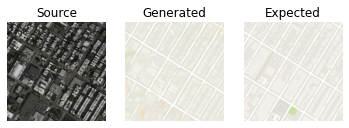

In [6]:
from keras.models import load_model
from numpy.random import randint
from os import listdir
from numpy import asarray, load
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np

model = load_model('model_010960.h5')


def load_images(path, size=(256,512)):
    src_list, tar_list = list(), list()
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into satellite and map
        sat_img, map_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [asarray(src_list), asarray(tar_list)]


def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()
    
path = 'maps/train/'
# load dataset
[src_images, tar_images] = load_images(path)
    
    
data = [src_images, tar_images]

def preprocess_data(data):
    # load compressed arrays
    # unpack arrays
    X1, X2 = data[0], data[1]
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

dataset = preprocess_data(data)



[X1, X2] = dataset
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)